## Necessary Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# import statements
import csv
import cv2
import numpy as np
import os
import pandas as pd
from pandas.core.frame import DataFrame
from pandas.core.common import index_labels_to_array
from sklearn import preprocessing
from IPython.display import display
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
from torch.optim import Adam
from torchvision import models, transforms
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error

## Initial Data Cleaning and Exploratory Analysis

### Data Cleaning

In [8]:
data_path = '/content/drive/MyDrive/DS4420_Project/socal2.csv'

# Array provided from Kaggle dataset that filters all unwanted images (duplicates, non front-facing exterior shots(several were Google maps screenshots))
unwanted_images = [ 0,2,3, 5,12,13,14,37,50,90,97,105,108,129,165,168,182,212,226,287,288,297,298,307,314,315,325,346,        358,365,366,368,373,379,380,382,391,402,413,423,432,433,443,448,458,466,467,477,482,488,490,491,492,493,        495,500,501,502,503,505,511,513,521,526,531,544,545,548,550,560,572,577,579,583,593,596,597,598,602,603,        604,615,617,627,628,632,634,638,662,663,664,680,682,688,717,747,748,752,784,798,799,807,810,822,826,840,        855,861,874,889,903,929,969,979,989,997,999,1000,1019,1020,1040,1047,1065,1067,1071,1081,1083,1088,1089,        1090,1103,1104,1108,1124,1128,1140,1174,1190,1204,1208,1214,1217,1227,1229,1234,1237,1238,1242,1263,1270,        1277,1303,1307,1310,1312,1318,1325,1326,1335,1347,1378,1397,1401,1403,1494,1497,1499,1502,1505,1508,1510,        1528,1531,1553,1561,1567,1581,1584,1592,1597,1607,1608,1614,1632,1643,1644,1645,1653,1655,1661,1668,1677,        1678,1687,1697,1699,1707,1725,1748,1775,1781,1793,1795,1805,1825,1826,1829,1834,1835,1856,1885,1888,1908,        1921,1943,1946,1949,1950,1953,1958,1974,1980,2020,2022,2026,2027,2030,2037,2047,2054,2055,2056,2057,2096,        2113,2114,2118,2120,2123,2130,2132,2133,2136,2142,2144,2149,2153,2154,2157,2159,2175,2182,2196,2199,2200,        2202,2204,2206,2210,2220,2228,2238,2239,2246,2266,2271,2282,2284,2285,2291,2293,2302,2307,2309,2321,2334,        2336,2337,2344,2345,2348,2351,2357,2367,2368,2373,2385,2387,2390,2399,2404,2412,2425,2426,2456,2458,2466,         2481,2485,2492,2495,2501,2503,2517,2523,2525,2535,2537,2545,2548,2554,2555,2556,2558,2574,2580,2599,2600,        2601,2606,2611,2616,2618,2619,2623,2632,2634,2637,2641,2648,2649,2662,2671,2676,2679,2683,2685,2693,2696,        2697,2703,2704,2711,2713,2729,2750,2751,2753,2754,2760,2763,2764,2765,2766,2767,2782,2783,2788,2791,2804,        2806,2811,2814,2823,2825,2833,2838,2845,2846,2855,2858,2859,2866,2869,2872,2874,2875,2881,2882,2892,2893,        2901,2906,2908,2909,2911,2914,2916,2918,2919,2924,2928,2931,2952,2954,2973,2981,2989,2998,3007,3008,3013,         3016,3017,3027,3029,3032,3044,3051,3052,3057,3058,3064,3068,3075,3083,3085,3092,3095,3098,3103,3105,3113,        3115,3123,3137,3143,3151,3154,3155,3163,3167,3173,3182,3192,3193,3194,3195,3196,3203,3208,3216,3217,3220,        3222,3225,3226,3229,3232,3233,3236,3238,3242,3244,3245,3246,3257,3260,3272,3273,3276,3278,3286,3292,3294,        3296,3297,3298,3302,3306,3308,3312,3315,3319,3328,3335,3337,3340,3343,3356,3360,3365,3366,3367,3374,3380,        3381,3384,3388,3390,3400,3410,3411,3412,3415,3416,3418,3420,3428,3429,3431,3435,3440,3441,3448,3449,3451,        3452,3454,3455,3460,3461,3464,3471,3474,3477,3480,3482,3483,3489,3490,3492,3495,3496,3497,3498,3499,3500,        3501,3502,3503,3505,3510,3511,3515,3516,3517,3518,3519,3521,3524,3530,3531,3532,3541,3545,3546,3551,3554,        3557,3558,3565,3569,3570,3575,3577,3580,3582,3585,3586,3587,3589,3590,3595,3599,3601,3603,3605,3612,3614,        3616,3625,3634,3637,3638,3639,3649,3651,3653,3655,3657,3668,3681,3682,3685,3686,3705,3714,3721,3722,3733,        3740,3742,3747,3749,3762,3772,3776,3780,3787,3795,3804,3805,3809,3812,3819,3824,3825,3838,3849,3854,3858,        3861,3863,3876,3879,3883,3886,3895,3899,3910,3917,3923,3925,3930,3932,3933,3936,3938,3945,3961,3963,3982,        3983,4000,4002,4008,4009,4012,4015,4020,4031,4033,4046,4048,4065,4066,4067,4070,4088,4089,4090,4104,4106,        4112,4118,4120,4121,4122,4124,4132,4133,4135,4166,4185,4189,4198,4205,4207,4219,4227,4228,4235,4237,4244,        4247,4255,4258,4264,4268,4272,4278,4285,4289,4310,4313,4314,4316,4328,4329,4335,4344,4348,4355,4356,4375,        4380,4387,4389,4395,4396,4408,4412,4419,4423,4426,4428,4435,4439,4456,4460,4468,4470,4471,4479,4485,4487,        4496,4500,4503,4507,4509,4511,4512,4522,4523,4533,4534,4535,4538,4540,4558,4562,4568,4574,4577,4579,4589,        4593,4594,4597,4598,4606,4611,4615,4616,4617,4618,4622,4638,4641,4646,4653,4654,4670,4671,4673,4677,4678,        4690,4697,4698,4703,4711,4714,4715,4716,4717,4718,4719,4720,4722,4723,4725,4730,4736,4744,4746,4748,4751,        4754,4755,4758,4767,4770,4773,4775,4776,4779,4781,4790,4798,4800,4805,4811,4812,4814,4815,4835,4840,4843,        4850,4852,4853,4855,4857,4860,4861,4872,4874,4881,4883,4890,4891,4892,4893,4895,4896,4898,4901,4903,4911,        4914,4923,4924,4925,4926,4927,4928,4929,4931,4936,4937,4938,4940,4943,4944,4945,4946,4949,4953,4957,4959,        4961,4962,4965,4968,4970,4972,4973,4977,4982,4984,4988,4989,4990,4993,4996,4999,5001,5002,5006,5007,5011,        5013,5014,5015,5017,5021,5022,5023,5028,5029,5031,5032,5034,5037,5038,5039,5040,5041,5042,5043,5044,5049,        5050,5051,5055,5058,5062,5064,5065,5066,5070,5072,5074,5075,5076,5077,5083,5084,5088,5089,5094,5098,5099,        5100,5101,5103,5106,5107,5108,5114,5117,5118,5119,5120,5121,5123,5124,5125,5129,5131,5134,5135,5136,5137,        5139,5148,5149,5151,5152,5154,5156,5157,5161,5163,5171,5172,5173,5174,5175,5177,5180,5189,5190,5191,5192,        5200,5208,5209,5212,5213,5214,5216,5218,5230,5231,5239,5242,5246,5262,5269,5271,5274,5288,5293,5296,5303,        5306,5307,5308,5312,5313,5317,5319,5329,5330,5341,5352,5368,5375,5376,5377,5396,5399,5403,5407,5409,5411,        5413,5417,5425,5427,5429,5430,5433,5445,5449,5457,5468,5470,5475,5486,5487,5488,5503,5507,5510,5511,5512,        5524,5530,5533,5542,5543,5550,5551,5558,5565,5567,5578,5580,5590,5591,5595,5603,5608,5622,5635,5640,5648,        5657,5677,5690,5701,5705,5708,5712,5713,5718,5719,5720,5722,5724,5725,5728,5739,5741,5742,5744,5745,5747,        5757,5760,5762,5773,5782,5786,5789,5804,5805,5827,5828,5832,5833,5844,5845,5847,5854,5856,5861,5862,5866,        5868,5875,5880,5906,5911,5912,5913,5919,5921,5924,5925,5930,5931,5932,5933,5934,5935,5941,5942,5949,5950,        5951,5952,5953,5955,5957,5983,5985,5997,6000,6002,6004,6009,6016,6026,6029,6031,6034,6047,6048,6052,6063,        6066,6103,6108,6109,6114,6115,6129,6134,6142,6165,6181,6221,6231,6250,6269,6272,6287,6296,6298,6304,6305,        6306,6322,6323,6340,6354,6355,6356,6368,6375,6379,6389,6390,6398,6400,6404,6406,6419,6421,6426,6432,6449,         6457,6466,6483,6488,6489,6500,6502,6503,6506,6509,6510,6511,6514,6524,6526,6542,6545,6546,6556,6568,6570,        6572,6582,6590,6592,6605,6607,6609,6617,6623,6624,6635,6636,6641,6648,6649,6657,6658,6662,6663,6666,6672,        6678,6684,6697,6698,6701,6702,6703,6706,6710,6714,6730,6735,6744,6748,6750,6751,6759,6769,6770,6778,6780,         6787,6790,6798,6802,6804,6805,6807,6809,6813,6817,6819,6821,6822,6826,6833,6835,6836,6848,6854,6859,6864,        6868,6872,6873,6879,6887,6893,6895,6897,6898,6899,6900,6901,6902,6929,6938,6939,6941,6947,6948,6964,6965,        6968,6969,6973,6982,6983,6986,6988,6992,6993,6994,6995,6999,7004,7006,7007,7012,7013,7015,7020,7029,7030,        7033,7034,7037,7038,7039,7040,7042,7045,7048,7060,7065,7066,7071,7085,7089,7090,7092,7093,7096,7097,7098,        7108,7113,7116,7120,7121,7124,7125,7142,7143,7144,7148,7154,7162,7163,7177,7179,7184,7185,7193,7198,7204,        7210,7211,7212,7231,7240,7247,7248,7252,7253,7254,7257,7265,7269,7276,7279,7286,7290,7291,7297,7303,7309,        7319,7321,7322,7323,7324,7325,7327,7333,7335,7336,7338,7343,7350,7352,7373,7374,7378,7386,7388,7390,7391,        7392,7403,7408,7416,7422,7424,7428,7433,7441,7443,7458,7470,7472,7474,7476,7481,7483,7484,7485,7488,7491,        7493,7495,7496,7518,7520,7523,7525,7526,7533,7535,7539,7540,7541,7542,7547,7549,7554,7555,7562,7564,7565,        7568,7570,7574,7579,7581,7583,7586,7589,7591,7592,7593,7606,7616,7619,7622,7627,7629,7632,7633,7634,7635,        7636,7637,7638,7639,7641,7642,7648,7649,7660,7664,7667,7670,7672,7677,7678,7680,7681,7682,7684,7685,7696,        7698,7699,7702,7703,7704,7707,7711,7714,7723,7727,7728,7729,7730,7733,7736,7738,7739,7743,7751,7753,7758,         7759,7761,7762,7772,7773,7787,7791,7794,7795,7798,7800,7808,7816,7817,7818,7820,7822,7823,7824,7826,7828,        7834,7835,7836,7837,7843,7848,7853,7854,7855,7869,7872,7874,7876,7877,7881,7882,7883,7885,7886,7887,7888,        7892,7893,7894,7895,7907,7914,7918,7921,7922,7929,7931,7932,7933,7934,7936,7941,7950,7951,7953,7954,7964,        7965,7968,7969,7970,7975,7976,7977,7978,7979,7980,7982,7983,7985,7986,7987,7991,7993,7995,7996,7997,7998,        7999,8001,8002,8003,8008,8009,8010,8016,8017,8020,8021,8023,8024,8025,8027,8028,8030,8031,8032,8034,8036,        8041,8043,8044,8045,8056,8057,8059,8063,8065,8068,8069,8070,8077,8081,8084,8087,8091,8095,8099,8114,8115,        8121,8130,8144,8145,8146,8153,8154,8155,8157,8173,8181,8185,8192,8193,8194,8195,8196,8197,8201,8210,8211,        8214,8219,8221,8223,8228,8229,8230,8237,8238,8241,8244,8246,8254,8256,8266,8271,8274,8275,8278,8280,8281,        8290,8294,8295,8298,8311,8317,8323,8339,8342,8346,8393,8395,8403,8417,8424,8428,8429,8438,8460,8469,8481,        8495,8508,8536,8556,8563,8572,8589,8632,8638,8644,8665,8694,8706,8709,8715,8722,8744,8747,8763,8764,8769,        8781,8786,8793,8794,8809,8821,8824,8830,8833,8845,8865,8886,8895,8900,8901,8907,8930,8931,8934,8942,8943,        8955,8960,8980,8989,8990,8992,8998,9007,9009,9013,9016,9049,9050,9057,9060,9062,9071,9081,9084,9085,9094,        9102,9118,9127,9130,9138,9140,9160,9163,9168,9179,9191,9194,9213,9218,9220,9222,9237,9240,9242,9269,9279,        9283,9296,9303,9312,9329,9332,9338,9345,9351,9372,9396,9414,9434,9441,9460,9487,9491,9492,9550,9572,9577,        9597,9618,9666,9676,9691,9701,9714,9716,9753,9766,9771,9772,9787,9825,9836,9841,9842,9847,9848,9849,9851,        9853,9854,9856,9864,9882,9884,9885,9002,9918,9955,9956,9963,9964,9965,9987,9993,9996,10000,10016,10020,        10072,10075,10082,10086,10091,10096,10105,10115,10116,10125,10145,10149,10163,10167,10169,10173,10181,        10183,10185,10194,10226,10227,10241,10248,10256,10260,10261,10268,10270,10294,10298,10307,10316,10320,        10322,10330,10357,10366,10375,10403,10412,10417,10420,10431,10442,10445,10451,10462,10465,10473,10483,        10488,10493,10497,10510,10576,10579,10583,10588,10591,10592,10593,10603,10604,10609,10611,10641,10645,        10655,10658,10668,10670,10687,10693,10697,10698,10700,10702,10703,10704,10706,10708,10709,10710,10720,        10725,10726,10727,10729,10731,10732,10734,10738,10741,10747,10748,10749,10754,10755,10757,10758,10760,        10761,10762,10770,10771,10772,10777,10779,10786,10793,10794,10797,10801,10802,10807,10811,10812,10814,         10815,10817,10818,10819,10821,10822,10829,10833,10834,10835,10836,10839,10842,10843,10846,10851,10857,        10858,10869,10870,10877,10879,10881,10882,10886,10887,10888,10889,10893,10894,10898,10899,10901,10905,        10909,10910,10912,10915,10917,10922,10923,10924,10927,10935,10936,10941,10950,10953,10959,10960,10962,        10971,10972,10974,10975,10976,10982,10983,10987,10992,11000,11002,11003,11012,11013,11019,11020,11022,        11023,11025,11031,11032,11033,11035,11047,11051,11057,11059,11060,11062,11064,11069,11080,11081,11083,        11084,11089,11090,11091,11092,11093,11095,11100,11102,11104,11106,11110,11113,11114,11117,11118,11128,        11138,11140,11143,11145,11147,11152,11153,11154,11157,11158,11168,11173,11175,11182,11185,11190,11192,        11194,11198,11203,11205,11209,11210,11212,11215,11217,11218,11222,11224,11225,11227,11229,11231,11240,        11250,11255,11261,11265,11267,11268,11269,11270,11272,11274,11277,11278,11280,11281,11282,11283,11285,        11287,11288,11289,11291,11292,11294,11296,11299,11300,11301,11302,11304,11306,11307,11308,11310,11311,        11313,11315,11320,11326,11328,11330,11331,11332,11333,11338,11340,11344,11350,11352,11354,11356,11364,        11365,11368,11371,11376,11386,11393,11394,11395,11397,11399,11400,11402,11403,11405,11412,11415,11416,        11418,11419,11421,11422,11431,11436,11440,11442,11443,11445,11447,11451,11456,11457,11459,11461,11462,        11463,11468,11469,11470,11481,11485,11486,11487,11488,11492,11493,11495,11497,11501,11508,11510,11513,        11514,11515,11516,11517,11521,11523,11525,11528,11531,11532,11537,11539,11547,11550,11553,11561,11567,        11569,11571,11572,11586,11593,11594,11596,11598,11600,11602,11603,11605,11608,11614,11621,11630,11663,        11637,11644,11650,11652,11654,11659,11663,11664,11667,11670,11675,11676,11680,11684,11685,11686,11701,        11703,11710,11713,11714,11715,11716,11729,11732,11737,11739,11741,11744,11747,11755,11761,11767,11770,        11776,11777,11780,11782,11786,11787,11793,11795,11798,11799,11802,11811,11815,11821,11822,11830,11833,        11836,11837,11840,11841,11844,11845,11847,11849,11865,11867,11876,11886,11894,11897,11902,11917,11919,        11923,11924,11927,11932,11933,11934,11935,11936,11938,11939,11942,11949,11956,11957,11958,11967,11970,        11976,11978,11980,11982,11984,11992,11996,11997,11998,11999,12003,12005,12006,12010,12017,12024,12035,        12037,12038,12041,12055,12066,12069,12070,12071,12072,12074,12075,12080,12087,12090,12104,12106,12107,        12109,12111,12112,12116,12120,12126,12130,12144,12146,12150,12154,12163,12169,12171,12183,12184,12186,        12189,12195,12198,12205,12208,12214,12219,12223,12228,12229,12231,12232,12234,12237,12249,12252,12256,        12260,12267,12270,12271,12273,12274,12275,12276,12280,12285,12289,12290,12294,12295,12298,12301,12304,        12306,12307,12308,12310,12313,12316,12319,12325,12326,12332,12339,12340,12344,12345,12349,12352,12355,        12357,12361,12363,12365,12377,12378,12380,12382,12386,12387,12394,12397,12399,12423,12429,12431,12434,        12441,12443,12446,12448,12449,12451,12453,12456,12462,12463,12466,12475,12479,12485,12486,12493,12498,        12503,12506,12514,12522,12523,12525,12529,12531,12542,12547,12549,12550,12554,12558,12559,12564,12569,        12575,12581,12582,12588,12590,12595,12596,12598,12599,12605,12613,12619,12623,12627,12631,12632,12634,        12642,12657,12660,12666,12669,12670,12676,12677,12682,12685,12686,12687,12690,12697,12704,12708,12710,         12711,12723,12725,12730,12743,12746,12749,12752,12754,12758,12759,12761,12763,12764,12772,12781,12785,        12786,12788,12794,12795,12800,12802,12804,12806,12812,12813,12819,12830,12832,12839,12841,12843,12848,        12849,12858,12861,12863,12865,12869,12873,12874,12875,12879,12880,12889,12889,12906,12922,12923,12925,        12926,12932,12937,12938,12947,12955,12956,12958,12962,12978,12988,12992,13002,13010,13019,13020,13026,        13037,13038,13039,13040,13050,13055,13058,13062,13063,13064,13065,13068,13070,13072,13076,13077,13080,        13081,13089,13090,13099,13101,13105,13016,13111,13112,13113,13114,13126,13131,13141,13142,13148,13149,        13155,13156,13171,13178,13179,13190,13197,13199,13215,13223,13229,13231,13235,13237,13238,13240,13244,        13245,13250,13254,13256,13260,13262,13264,13265,13266,13269,13270,13271,13277,13289,13293,13294,13295,        13296,13301,13308,13311,13312,13320,13321,13322,13326,13331,13332,13334,13337,13339,13344,13348,13354,        13355,13360,13362,13363,13370,13386,13387,13390,13410,13413,13419,13424,13439,13443,13445,13448,13449,        13455,13457,13459,13460,13461,13482,13484,13490,13491,13492,13495,13502,13506,13507,13509,13511,13513,        13515,13516,13524,13530,13531,13532,13533,13537,13540,13544,13547,13552,13555,13559,13566,13570,13571,        13572,13573,13575,13578,13580,13582,13587,13595,13598,13602,13633,13637,13640,13673,13674,13680,13681,        13693,13697,13700,13709,13718,13732,13736,13744,13750,13751,13754,13764,13769,13780,13786,13787,13796,        13805,13806,13815,13821,13823,13827,13831,13835,13837,13843,13844,13856,13877,13887,13900,13908,13909,        13912,13918,13922,13933,13948,13952,13962,13988,13989,13996,13999,14007,14008,14010,14017,14024,14032,        14034,14044,14050,14051,14054,14067,14078,14079,14082,14101,14105,14107,14121,14123,14124,14125,14127,        14128,14139,14140,14145,14150,14174,14175,14176,14184,14186,14188,14190,14197,14201,14202,14224,14229,        14238,14249,14254,14256,14257,14258,14268,14269,14270,14280,14282,14287,14307,14308,14309,14311,14330,        14342,14343,14344,14345,14346,14347,14353,14355,14356,14358,14360,14362,14363,14371,14372,14468,14476,        14481,14495,14504,14519,14529,14533,14541,14551,14555,14564,14566,14567,14580,14581,14583,14593,14599,        14603,14604,14611,14621,14622,14624,14628,14682,14683,14687,14695,14697,14699,14704,14705,14706,14708,         14715,14733,14753,14766,14767,14769,14784,14785,14786,14787,14790,14792,14796,14797,14798,14809,14810,        14813,14816,14837,14839,14840,14842,14875,14878,14896,14903,14911,14929,14938,14940,14941,14957,14969,        14971,14989,14991,15020,15023,15031,15045,15055,15060,15072,15089,15124,15135,15145,15149,15155,15156,        15158,15161,15162,15179,15180,15190,15213,15214,15217,15218,15223,15229,15233,15248,15264,15269,15270,        15273,15275,15280,15288,15304,15312,15325,15337,15338,15343,15345,15346,15356,15360,15368,15371,15375,        15376,15377,15378,15382,15383,15390,15391,15398,15402,15405,15407,15408,15411,15412,15415,15420,15433,        15434,15411,15448,15451,15453,15454,15456,15461,15465,15468,15471,15473]

In [9]:
# loads the housing data from into a dataframe and performs some minor data cleaning
def load_house_numerical_data(path: str):
  
  # loading the data into a dataframe
  columns = ["image_id", "street", "city", "encoded_city", "beds", "baths", "sqft", "price"]
  df = pd.read_csv(path, names=columns, skiprows=1)
  df.drop(["city", "street"], axis=1, inplace=True)

  # drop unwanted images
  df.drop(df[df["image_id"].isin(unwanted_images)].index, inplace=True)
  df.reset_index(drop=True, inplace=True)

  # drops rows from cities that are not well represented in the dataset
  city_counts = df["encoded_city"].value_counts().tolist()
  for (city_code, city_count) in zip(df["encoded_city"], city_counts):
    if city_count < 20:
      df.drop(df[df["encoded_city"] == city_code].index, inplace=True)

  df.reset_index(drop=True, inplace=True)
  return df

### Exploratory Analysis

In [34]:
# Load house dataset and get head
df = load_house_numerical_data(data_path)
df.head()

,image_id,encoded_city,beds,baths,sqft,price
0,1,48,3,2.0,713,228500
1,4,55,4,3.0,2547,385100
2,6,55,4,3.0,2769,415000
3,7,48,5,2.1,2600,545000
4,8,48,5,2.1,2600,545000


In [ ]:
# display an image from the dataset
image = Image.open(r"/content/drive/MyDrive/DS4420_Project/socal_pics/103.jpg")
display(image)

In [ ]:
# Display an unwanted image
image = Image.open(r"/content/drive/MyDrive/DS4420_Project/socal_pics/2.jpg")
display(image)

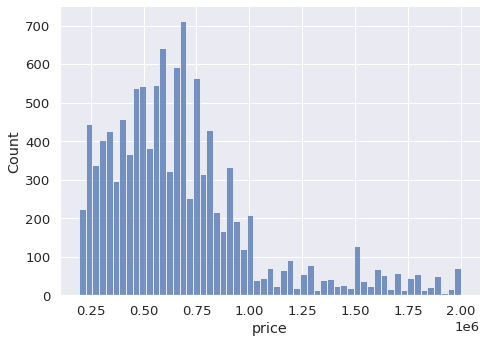

In [ ]:
# Plot distribution of price (target variable)
sns.set(style='darkgrid', font_scale=1.2)
sns.displot(
    data=df,
    x='price',
    kind='hist',
    aspect=1.4
    #log_scale=10
)

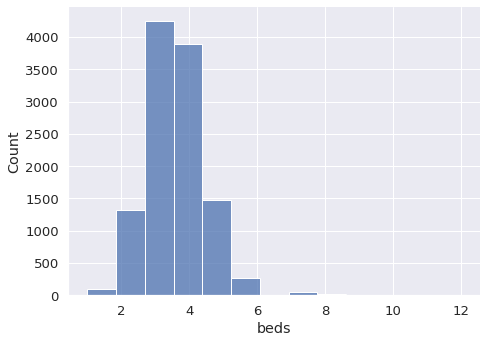

In [ ]:
# plot distribution of number of beds
sns.displot(
    data=df,
    x='beds',
    kind='hist',
    aspect=1.4,
    bins=13,
    #log_scale=10
)

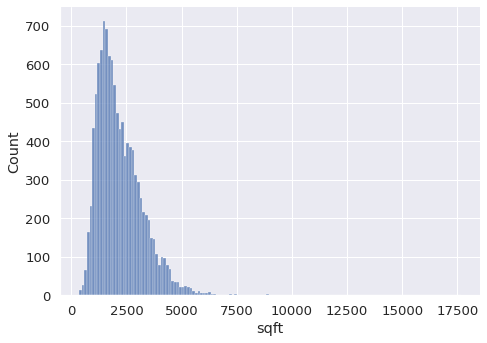

In [ ]:
# plot distribution of square footage
sns.displot(
    data=df,
    x='sqft',
    kind='hist',
    aspect=1.4
    #log_scale=10
)

In [ ]:
# Finding the top 20 most frequent cities in our dataset
top_20 = df['encoded_city'].value_counts()[:20].index.tolist() 
data_ex_chopped = df.loc[df['encoded_city'].isin(top_20)]

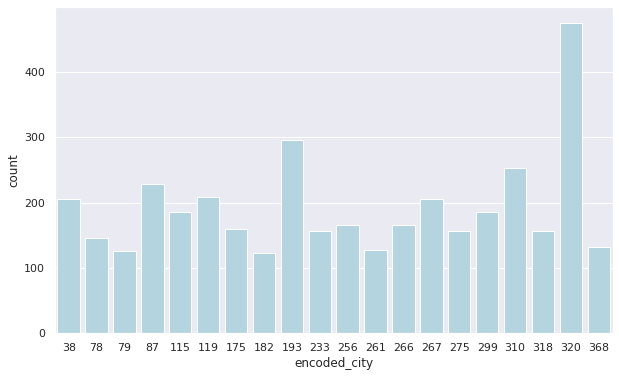

In [ ]:
# Get top 20 most popular cities and plot bar graph of number of houses sold per city
top_20 = df['encoded_city'].value_counts()[:20].index.tolist() 
data_ex_chopped = df.loc[df['encoded_city'].isin(top_20)]
sns.set(rc = {'figure.figsize':(10,6)})
sns.countplot(x='encoded_city', data=data_ex_chopped, color='lightblue')

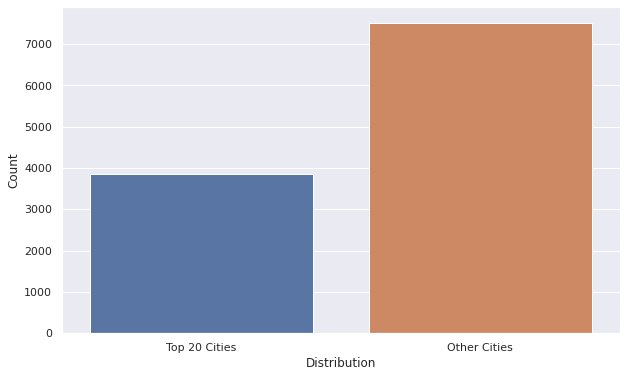

In [ ]:
# Plot count of houses between top 20 cities and remaining
d = {'Distribution':['Top 20 Cities', 'Other Cities'],
     'Count': [len(data_ex_chopped), len(df) - len(data_ex_chopped)]}
city_counts = pd.DataFrame(data=d)
sns.barplot(x='Distribution', y='Count', data=city_counts)

## Basic MLP without Images


In [36]:
def visualize_func(actual_labels, predictions):
  preds = pd.DataFrame(data=predictions, columns=["Value"])
  preds["type"] = "Prediction"
  actual = pd.DataFrame(data=actual_labels, columns=["Value"])
  actual["type"] = "Actual"
  total = pd.concat([preds, actual])
  total["all"] = ""
  ax = sns.violinplot(x="all", y="Value", data=total, hue="type", palette="muted", split=True)
  plt.show()

### Define Dataset

In [12]:
# represents the housing dataset to pass into a model
class HouseDataset(torch.utils.data.Dataset):
  def __init__(self, X: pd.DataFrame, y):
    continuous_columns = ["beds", "baths", "sqft"]

    # scaling the data using StandardScaler()
    X_scaled = preprocessing.StandardScaler().fit_transform(X[continuous_columns])

    # encoding the city codes using one-hot encoding
    encoded_city_one_hot = preprocessing.LabelBinarizer().fit(X["encoded_city"])
    X_encoded = encoded_city_one_hot.transform(X["encoded_city"])

    # group arrays
    X = np.hstack([X_scaled, X_encoded])

    # creates tensors from X and y if they are not already
    if not torch.is_tensor(X) or not torch.is_tensor(y):
      self.X = torch.from_numpy(X)
      self.y = torch.from_numpy(y.to_numpy())

    self.X = self.X.float()
    self.y = self.y.float()


  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]


In [13]:
# gets the X and y datasets as a training and validation set
def get_datasets():

  # Load the tabular data
  df = load_house_numerical_data(data_path)

  y = df["price"]
  df.drop(["price", "image_id"], axis=1, inplace=True)
  X = df
  
  # Normalize price
  y = y / y.max()

  torch.manual_seed(0)

  # Get pytorch datasets
  dataset = HouseDataset(X, y)
  
  # Split dataset
  train_length = int(len(X) * .8)
  train_dataset, val_dataset = random_split(
    dataset, [train_length, len(X) - train_length],
    generator=torch.Generator().manual_seed(0))
  
  return train_dataset, val_dataset

### Create Basic MLP

In [14]:
# Multilayer Perceptron class
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(350, 8),
      nn.ReLU(),
      nn.Linear(8, 4),
      nn.ReLU(),
      nn.Linear(4, 1),
  )
    
  def forward(self, x):
    return self.layers(x)

In [35]:
# performs the validation loop for training the model
def validation_loop(model, loss_fn, val_dataset, batch_size=128,
                    device='cuda:0', visualize_func=None):
  with torch.no_grad():
    val_loss = 0
    dl = DataLoader(val_dataset, batch_size=batch_size)
    actual = np.array([])
    predictions = np.array([])
    for i, (x, y) in enumerate(dl):
      # x = x.to(device)
      outs = model(x)
      outs = torch.reshape(outs, (-1,))
      
      val_loss += loss_fn(outs, y).item()

      actual = np.append(actual, y.numpy())
      predictions = np.append(predictions, outs.numpy())
    val_loss = val_loss / len(dl)
    if visualize_func is not None:
      visualize_func(actual, predictions)
    return val_loss


# function that trains the model on the housing dataset
def train_model(model, optimizer, loss_fn, train_dataset, val_dataset,
                epochs=10, validate_every=1, device='cuda:0',
                visualize_func=None, verbose=True, batch_size=50):
  
  # model = model.to(device)
  train_losses = []
  train_epochs = []
  val_losses = []
  val_epochs = []
  
  epoch = 0
  val_epoch = 0
  next_val_epoch = 0
  # loops through the epochs
  while epochs > epoch:
    dl = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
    print("beginning training")
    with torch.enable_grad():
      train_loss = 0
      # updates the losses and applies gradient descent and backpropogation
      for i, (x, y) in enumerate(dl):
        # x = x.to(device)
        outs = model(x)
        outs = torch.reshape(outs, (-1,))

        loss = loss_fn(outs, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

      epoch += 1
      train_epochs.append(epoch)

      train_loss = train_loss / len(dl)
      train_losses.append(train_loss)
    
      # runs the validation loop if on a validation epoch
      if epoch % validate_every == 0:
        val_loss = validation_loop(model, loss_fn, val_dataset, batch_size=128,
                        device='cuda:0', visualize_func=visualize_func)
        val_losses.append(val_loss)
        val_epoch += 1
        val_epochs.append(val_epoch)

      # if visualize_func is not None:
      #   visualize_func(model, train_dataset, device)

      if verbose:
        print("train loss (epoch: {}): {}".format(epoch, train_loss))
        if epoch % validate_every == 0:
          print("validation loss (epoch: {}): {}".format(epoch, val_loss))
      
  return np.array(train_epochs), \
      np.array(train_losses), \
      np.array(val_epochs), \
      np.array(val_losses)


### Train MLP Model

In [ ]:
# Get datasets
train_dataset, val_dataset = get_datasets()

# Get model, optimizer, and train
mlp = MLP()
optimizer = Adam(mlp.parameters(), lr=1e-3)
train_epochs, train_losses, val_epochs, val_losses = train_model(
    mlp, optimizer, nn.L1Loss(), train_dataset, val_dataset, epochs=20, visualize_func=visualize_func,
    batch_size=100)

In [ ]:
# Plot training and validation loss (Mean Absolute Error)
plt.figure(figsize=(12,10))
plt.plot(train_epochs, train_losses, label='Training')
plt.plot(val_epochs, val_losses, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
'''
This cell measures the MAE if we were to just predict the mean.
'''

# Loading in our dataset
df_mean = load_house_numerical_data(data_path)

# Extracting the target variable
y_ = df_mean['price']

# Applying the same scaling that we do in our neural networks
y_ = y_ / y_.max()

# Creating an array of predictions only using the mean
pred_mean = np.full((1, len(y_)), y_.mean())[0]
# Creating an array of actuals
pred_actual = np.array(y_)

# Finding the mean absolute error
mae_mean = mean_absolute_error(pred_actual, pred_mean)
print("The MAE of predicting the mean is {}".format(mae_mean))

The MAE of predicting the mean is 0.13070560056255195


## MLP Model with Images

### Feature Extraction using Vgg16 CNN Model

In [ ]:
# Import Vgg16 model that will be used for feature extraction
model = models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

In [ ]:
'''
This is the strucutre of the VGG16 CNN in which we extracted features from

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (18): ReLU(inplace=True)
    (19): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (20): ReLU(inplace=True)
    (21): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (22): ReLU(inplace=True)
    (23): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (24): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (25): ReLU(inplace=True)
    (26): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (27): ReLU(inplace=True)
    (28): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (29): ReLU(inplace=True)
    (30): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(7, 7))
  (classifier): Sequential(
    (0): Linear(in_features=25088, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False)
    (3): Linear(in_features=4096, out_features=4096, bias=True)
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.5, inplace=False)
    (6): Linear(in_features=4096, out_features=1000, bias=True)
  )
)

'''

In [ ]:
# Define feature extractor
class FeatureExtractor(nn.Module):
  def __init__(self, model):
    super(FeatureExtractor, self).__init__()
		# Extract VGG-16 Feature Layers
    self.features = list(model.features)
    self.features = nn.Sequential(*self.features)
		# Extract VGG-16 Average Pooling Layer
    self.pooling = model.avgpool
		# Convert the image into one-dimensional vector
    self.flatten = nn.Flatten()
		# Extract the first part of fully-connected layer from VGG16
    self.fc = model.classifier[0]
  
  def forward(self, x):
		# It will take the input 'x' until it returns the feature vector called 'out'
    out = self.features(x)
    out = self.pooling(out)
    out = self.flatten(out)
    out = self.fc(out) 
    return out 

# Initialize the model
model = models.vgg16(pretrained=True)
new_model = FeatureExtractor(model)

# Change the device to GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
new_model = new_model.to(device)

In [ ]:
'''
We initially tried to run through all the features and save it to an array.
However, this code took so long to run that the runtime would disconnect 
before this was able to complete. We ended up having to run this code two 
times, saving each feature vector to a CSV file as it was made. Then when 
the runtime was disconnected we started again where it left off and saved to a 
new CSV, eventually combining the CSV files to get all the feature vectors.
To do this we changed this block of code and reran it to start at a different
point in the 'df2' variable set below. This portion is not shown in our final
notebook, but the next couple cells show the results of this.
'''


# Transform the image, so it becomes readable with the model
transform = transforms.Compose([
  transforms.ToPILImage(),
  transforms.CenterCrop(512),
  transforms.Resize(448),
  transforms.ToTensor()                              
])

# Will contain the feature
features = []

# Creating the column names for the image feature vectors
cols = ['image_id']
for i in range(0, 4096):
  cols.append('image_feat_{}'.format(i))

# Dataframe to iterate through when extracting features (changed on second run)
df2 = load_house_numerical_data(data_path)

# Path to the image folder 
img_path = '/content/drive/MyDrive/DS4420_Project/socal_pics/'

# Iterate each image
with open('/content/drive/MyDrive/DS4420_Project/image_feats2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(cols)
    for i in df2['image_id']:
      # Set the image path
      path = img_path + '{}.jpg'.format(i)
      # Read the file
      img = cv2.imread(path)
      # Transform the image
      img = transform(img)
      # Reshape the image. PyTorch model reads 4-dimensional tensor
      # [batch_size, channels, width, height]
      img = img.reshape(1, 3, 448, 448)
      img = img.to(device)
      # We only extract features, so we don't need gradient
      with torch.no_grad():
        # Extract the feature from the image
        feature = new_model(img)
      # Convert to NumPy Array, Reshape it, and save it to features variable
      #features.append(feature.cpu().detach().numpy().reshape(-1))
      feat = feature.cpu().detach().numpy().reshape(-1)
      feat = np.insert(feat, 0, i)
      features.append(feat)
      feat_list = feat.tolist()
      writer.writerow(feat_list)

# Convert to NumPy Array
features = np.array(features)

10778
10779
10780
10781
10782
10783
10784
10785
10786
10787
10788
10789
10790
10791
10792
10793
10794
10795
10796
10797
10798
10799
10800
10801
10802
10803
10804
10805
10806
10807
10808
10809
10810
10811
10812
10813
10814
10815
10816
10817
10818
10819
10820
10821
10822
10823
10824
10825
10826
10827
10828
10829
10830
10831
10832
10833
10834
10835
10836
10837
10838
10839
10840
10841
10842
10843
10844
10845
10846
10847
10848
10849
10850
10851
10852
10853
10854
10855
10856
10857
10858
10859
10860
10861
10862
10863
10864
10865
10866
10867
10868
10869
10870
10871
10872
10873
10874
10875
10876
10877
10878
10879
10880
10881
10882
10883
10884
10885
10886
10887
10888
10889
10890
10891
10892
10893
10894
10895
10896
10897
10898
10899
10900
10901
10902
10903
10904
10905
10906
10907
10908
10909
10910
10911
10912
10913
10914
10915
10916
10917
10918
10919
10920
10921
10922
10923
10924
10925
10926
10927
10928
10929
10930
10931
10932
10933
10934
10935
10936
10937
10938
10939
10940
10941
10942
10943
1094

In [ ]:
# Open first half of images
image_df = pd.read_csv('/content/drive/MyDrive/DS4420_Project/image_feats.csv')
# Showing where the first extraction of features left off
image_df.tail()

,image_id,image_feat_0,image_feat_1,image_feat_2,image_feat_3,image_feat_4,image_feat_5,image_feat_6,image_feat_7,image_feat_8,...,image_feat_4086,image_feat_4087,image_feat_4088,image_feat_4089,image_feat_4090,image_feat_4091,image_feat_4092,image_feat_4093,image_feat_4094,image_feat_4095
9540,10773.0,-0.110854,-0.552595,-0.606830,-2.766397,-0.268312,1.048075,-1.672660,-2.455260,-3.309690,...,0.346754,-0.203887,-0.221225,-0.302491,-0.857553,-1.561839,-3.562048,-1.494169,-0.384701,-1.211944
9541,10774.0,-0.085521,0.010888,0.402079,-2.174906,-1.273506,0.281585,-1.649435,-1.282445,-2.549623,...,0.466301,-0.047190,-0.211136,-0.237475,-0.228259,-0.882304,-3.296841,-1.761985,0.042547,-0.468724
9542,10775.0,0.242696,-0.451640,0.418293,-2.385950,-0.683928,0.141534,-1.585012,-2.296042,-2.135765,...,-0.363508,0.526845,-1.394073,0.864698,0.040467,-0.875656,-3.075573,-2.191916,-0.718733,-0.592228
9543,10776.0,-0.092046,-0.196966,-0.278972,-1.781560,-0.589548,-0.130260,-1.523906,-2.158919,-2.858471,...,0.752526,-0.090074,-0.562156,0.193522,-0.135059,-0.836155,-2.787671,-1.892619,-0.011097,-1.299169
9544,10777.0,-0.156541,-0.396925,1.045475,-3.177025,-2.086681,0.816684,-1.938611,-1.977506,-2.381293,...,0.180105,0.350468,-1.472549,1.100483,-0.577877,-1.578756,-4.088433,-1.953213,-0.474514,-0.042722


In [ ]:
# Open the second half of the images
image_df2 = pd.read_csv('/content/drive/MyDrive/DS4420_Project/image_feats2.csv')
# Showing where the second extraction of features picked up
image_df2.head()

,image_id,image_feat_0,image_feat_1,image_feat_2,image_feat_3,image_feat_4,image_feat_5,image_feat_6,image_feat_7,image_feat_8,...,image_feat_4086,image_feat_4087,image_feat_4088,image_feat_4089,image_feat_4090,image_feat_4091,image_feat_4092,image_feat_4093,image_feat_4094,image_feat_4095
0,10778.0,-0.225924,-0.352132,-0.482840,-3.930421,-1.278142,1.149203,-2.681202,-3.086200,-2.391368,...,-0.358332,0.196080,-1.287925,0.487823,-0.891555,-1.256136,-3.492488,-1.913405,-0.671649,-0.756263
1,10779.0,-0.177993,-0.473448,0.412562,-1.802371,-1.069548,1.062105,-2.163913,-3.013855,-3.121870,...,-0.194825,-0.169567,-0.863944,0.533090,-0.071708,-2.014082,-3.066899,-1.754583,-0.300830,-0.223226
2,10780.0,0.106499,-0.070369,-0.190605,-2.555352,-0.800030,0.925270,-1.547799,-2.323490,-3.739800,...,0.589547,-0.108709,-1.089214,-0.131828,-1.540891,-1.395535,-4.429063,-1.538732,-1.034012,-0.466210
3,10781.0,0.338970,-0.439981,0.034891,-1.663147,-0.831383,-0.063103,-2.052929,-2.624712,-2.676709,...,0.588448,-0.375176,-0.939571,0.223365,-0.562492,-1.015602,-2.560181,-1.664881,-0.177734,-0.791545
4,10782.0,-0.012383,0.434908,0.394900,-2.521301,-1.445433,0.905408,-2.070567,-1.889681,-2.211685,...,0.496543,-0.030264,-0.977190,0.318985,0.163325,-1.815537,-3.174068,-2.095360,-0.476006,-0.286345


In [ ]:
# concatenate both image features dataframes
image_features = pd.concat([image_df, image_df2])
print(len(image_features))

# Save to CSV
image_features.to_csv('/content/drive/MyDrive/DS4420_Project/image_features.csv')

14241


### Define Images Dataset for MLP

In [81]:
class HouseImages(torch.utils.data.Dataset):
    """Tabular and Image dataset."""

    def __init__(self, image_features, x_tabular):
        # Scale price column
        self.y = x_tabular["price"] / x_tabular["price"].max()

        # Save image_ids
        self.x_image_ids = x_tabular["image_id"]

        # encoding the city codes using one-hot encoding
        encoded_city_one_hot = preprocessing.LabelBinarizer().fit(x_tabular["encoded_city"])
        X_encoded = encoded_city_one_hot.transform(x_tabular["encoded_city"])

        # scaling the data using StandardScaler()
        continuous_columns = ["beds", "baths", "sqft"]
        X_scaled = preprocessing.StandardScaler().fit_transform(x_tabular[continuous_columns])
        
        self.image_features = image_features
        self.X = pd.DataFrame(np.hstack([X_scaled, X_encoded]))

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        # Get row
        X = self.X.iloc[idx, 0:]

        # Get corresponding image from image_features
        image_id = self.x_image_ids[idx]
        image = self.image_features.loc[self.image_features["image_id"] == image_id].copy()
        image.drop(["image_id"], axis=1, inplace=True)

        # Turn into tensors
        X = X.tolist()
        X = torch.FloatTensor(X)
        image = image.iloc[0, :].tolist()
        image = torch.FloatTensor(image)

        return image, X, self.y.iloc[idx]

In [43]:
def load_csvs_into_dataframe():
  # load image_features
  print("reading images")
  image_features_df = pd.read_csv('/content/drive/MyDrive/DS4420_Project/image_features.csv')
  image_features_df.drop(["Unnamed: 0"], axis=1, inplace=True)
  image_features_df["image_id"]= image_features_df["image_id"].astype(int)

  # load tabular data
  tabular_df = load_house_numerical_data('/content/drive/MyDrive/DS4420_Project/socal2.csv')

  # Drop images where we don't have matching tabular data, drop tabular tabular data where we dont have matching images
  image_features_df.drop(image_features_df[~image_features_df["image_id"].isin(tabular_df["image_id"])].index, inplace=True)
  image_features_df.reset_index(drop=True, inplace=True)
  tabular_df.drop(tabular_df[~tabular_df["image_id"].isin(image_features_df["image_id"])].index, inplace=True)
  tabular_df.reset_index(drop=True, inplace=True)

  print(tabular_df.shape)
  print(image_features_df.shape)
  return image_features_df, tabular_df

def get_datasets_with_images(image_features_df, tabular_df):
  image_features = image_features_df
  X = tabular_df

  torch.manual_seed(0)

  # Get datasets
  dataset = HouseImages(image_features, X)

  # Split into training and validation
  train_length = int(len(X) * .8)
  train_dataset, val_dataset = random_split(
    dataset, [train_length, len(X) - train_length],
    generator=torch.Generator().manual_seed(0))
  
  return train_dataset, val_dataset

### Create MLP with Image Features




In [80]:
# Define neural network class
class ImageMLP(nn.Module):
  def __init__(self, image_model_only=False):
    super().__init__()
    self.image_model_only = image_model_only
    if image_model_only:
      print("Training model with only images, no tabular data.")
    else:
      print("Training model with image and tabular data.")
    self.tabular_layers = nn.Sequential(
      nn.Linear(346, 16),
      nn.ReLU(),
      nn.Linear(16, 8),
      nn.ReLU(),
      nn.Linear(8, 4),
      nn.ReLU(),
    )
    self.image_layers = nn.Sequential(
        nn.Linear(4096, 32),
        nn.ReLU(),
        nn.BatchNorm1d(32),
        nn.Dropout(0.5),
        nn.Linear(32, 16),
        nn.ReLU(),
        nn.Linear(16, 4),
        nn.ReLU()
    )
    self.relu = nn.ReLU()
    self.output_layer = nn.Linear(8, 1)
    self.output_layer_image_model_only = nn.Linear(4, 1)
    
  def forward(self, image_features, x):
    # Process image features
    image = self.image_layers(image_features)

    if self.image_model_only:
      return self.output_layer_image_model_only(image)

    # Process tabular data
    x = self.tabular_layers(x)

    # Concatenate models
    x = torch.cat((image, x), dim=1)
    x = self.relu(x)

    # Return result from output layer
    return self.output_layer(x)

In [50]:
# performs the validation loop for training the model
def validation_loop(model, loss_fn, val_dataset, batch_size=128,
                    device='cuda:0', visualize_func=None):
  with torch.no_grad():
    val_loss = 0
    dl = DataLoader(val_dataset, batch_size=batch_size)
    actual = np.array([])
    predictions = np.array([])
    for i, (image_features, x, y) in enumerate(dl):
      # x = x.to(device)
      outs = model(image_features, x)
      outs = torch.reshape(outs, (-1,))
      
      val_loss += loss_fn(outs, y).item()

      actual = np.append(actual, y.numpy())
      predictions = np.append(predictions, outs.numpy())
    val_loss = val_loss / len(dl)
    if visualize_func is not None:
      visualize_func(actual, predictions)
    return val_loss


# function that trains the model on the housing dataset
def train_model(model, optimizer, loss_fn, train_dataset, val_dataset,
                epochs=10, validate_every=1, device='cuda:0',
                visualize_func=None, verbose=True, batch_size=50):
  
  # model = model.to(device)
  train_losses = []
  train_epochs = []
  val_losses = []
  val_epochs = []
  
  epoch = 0
  val_epoch = 0
  next_val_epoch = 0
  # loops through the epochs
  while epochs > epoch:
    dl = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
    print("beginning training")
    with torch.enable_grad():
      train_loss = 0
      # updates the losses and applies gradient descent and backpropogation
      for i, (image_features, x, y) in enumerate(dl):
        # x = x.to(device)
        # image = image.to(device)
        outs = model(image_features, x)
        outs = torch.reshape(outs, (-1,))

        loss = loss_fn(outs, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

      epoch += 1
      train_epochs.append(epoch)

      train_loss = train_loss / len(dl)
      train_losses.append(train_loss)
    
      # runs the validation loop if on a validation epoch
      if epoch % validate_every == 0:
        val_loss = validation_loop(model, loss_fn, val_dataset, batch_size=128,
                        device='cuda:0', visualize_func=visualize_func)
        val_losses.append(val_loss)
        val_epoch += 1
        val_epochs.append(val_epoch)

      # if visualize_func is not None:
      #   visualize_func(model, train_dataset, device)

      if verbose:
        print("train loss (epoch: {}): {}".format(epoch, train_loss))
        if epoch % validate_every == 0:
          print("validation loss (epoch: {}): {}".format(epoch, val_loss))
      
  return np.array(train_epochs), \
      np.array(train_losses), \
      np.array(val_epochs), \
      np.array(val_losses)

### Train MLP with Images and Tabular Data

In [46]:
# Get dataframes of image features and tabular data
image_features_df, tabular_df = load_csvs_into_dataframe()

reading images
(11319, 6)
(11319, 4097)


In [75]:
# Get pytorch datasets
train_dataset, val_dataset = get_datasets_with_images(image_features_df.copy(), tabular_df.copy())

beginning training


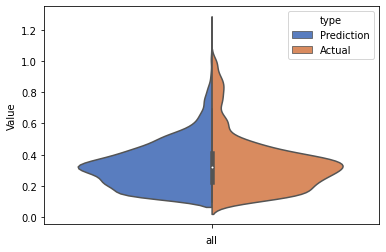

train loss (epoch: 1): 0.09654853214601894
validation loss (epoch: 1): 0.060668603206674256
beginning training


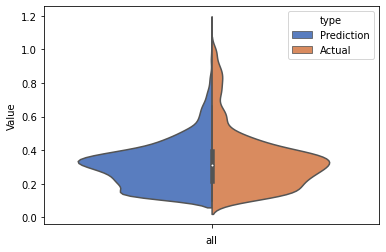

train loss (epoch: 2): 0.05759402086119075
validation loss (epoch: 2): 0.057001691311597824
beginning training


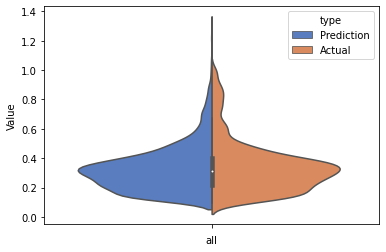

train loss (epoch: 3): 0.05489413657194966
validation loss (epoch: 3): 0.055139419519239
beginning training


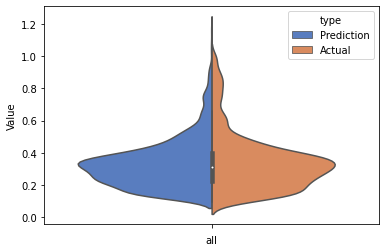

train loss (epoch: 4): 0.05209918442990754
validation loss (epoch: 4): 0.05438758246600628
beginning training


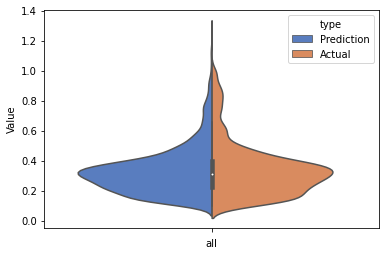

train loss (epoch: 5): 0.0500518279661844
validation loss (epoch: 5): 0.05405966916845904
beginning training


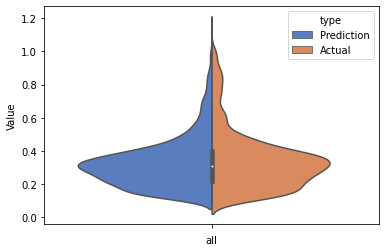

train loss (epoch: 6): 0.049995015446956344
validation loss (epoch: 6): 0.053957568067643374
beginning training


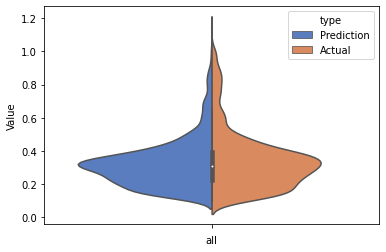

train loss (epoch: 7): 0.04855374774926311
validation loss (epoch: 7): 0.05448707193136215
beginning training


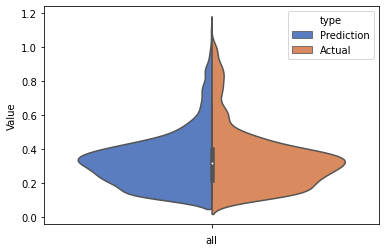

train loss (epoch: 8): 0.04845158194938859
validation loss (epoch: 8): 0.05328445488380061
beginning training


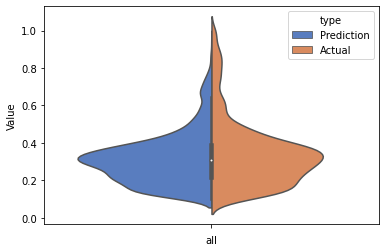

train loss (epoch: 9): 0.04801646722378312
validation loss (epoch: 9): 0.055498807380596794
beginning training


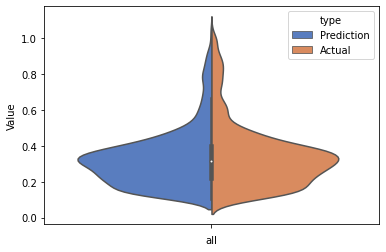

train loss (epoch: 10): 0.047560493901863204
validation loss (epoch: 10): 0.0523095755941338
beginning training


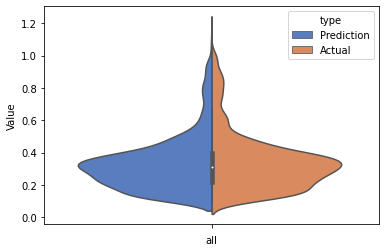

train loss (epoch: 11): 0.04663209928261055
validation loss (epoch: 11): 0.05332367950015598
beginning training


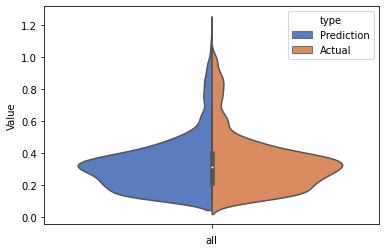

train loss (epoch: 12): 0.0469074747473984
validation loss (epoch: 12): 0.05314172307650248
beginning training


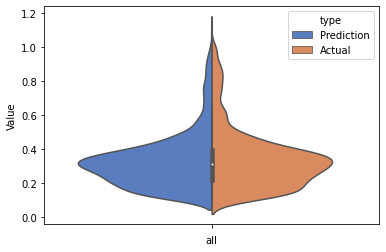

train loss (epoch: 13): 0.04661927495028947
validation loss (epoch: 13): 0.0520822209202581
beginning training


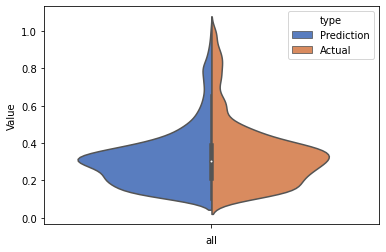

train loss (epoch: 14): 0.04575344500551512
validation loss (epoch: 14): 0.05380260054435995
beginning training


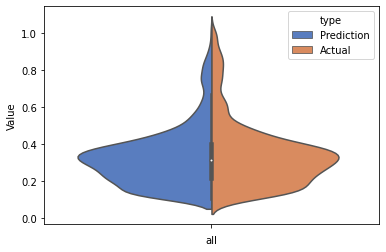

train loss (epoch: 15): 0.04588618182710239
validation loss (epoch: 15): 0.0517994813207123
beginning training


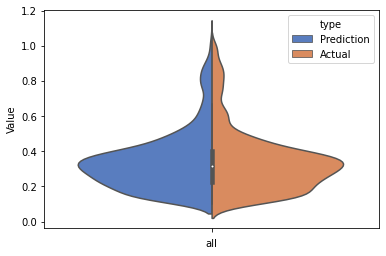

train loss (epoch: 16): 0.04507988060896213
validation loss (epoch: 16): 0.052813575913508735
beginning training


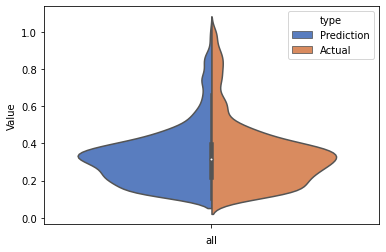

train loss (epoch: 17): 0.04519937662305413
validation loss (epoch: 17): 0.05161250320573648
beginning training


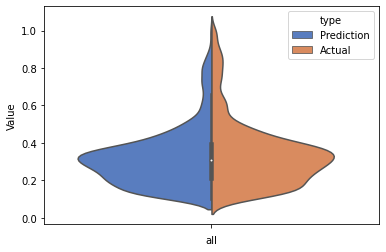

train loss (epoch: 18): 0.04439593763551214
validation loss (epoch: 18): 0.05240392602152295
beginning training


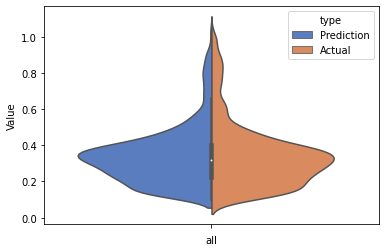

train loss (epoch: 19): 0.044594708359339735
validation loss (epoch: 19): 0.05196887751420339
beginning training


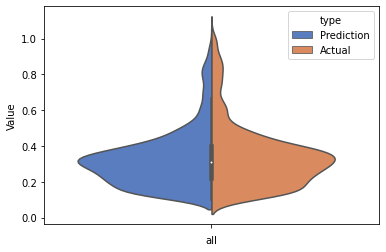

train loss (epoch: 20): 0.04449160435943158
validation loss (epoch: 20): 0.05188750123812093


In [76]:
# Get model, optimizer, and do training
imageMLP = ImageMLP()
optimizer = Adam(imageMLP.parameters(), lr=1e-2)
train_epochs, train_losses, val_epochs, val_losses = train_model(
    imageMLP, optimizer, nn.L1Loss(), train_dataset, val_dataset, epochs=20, visualize_func=visualize_func,
    batch_size=100)

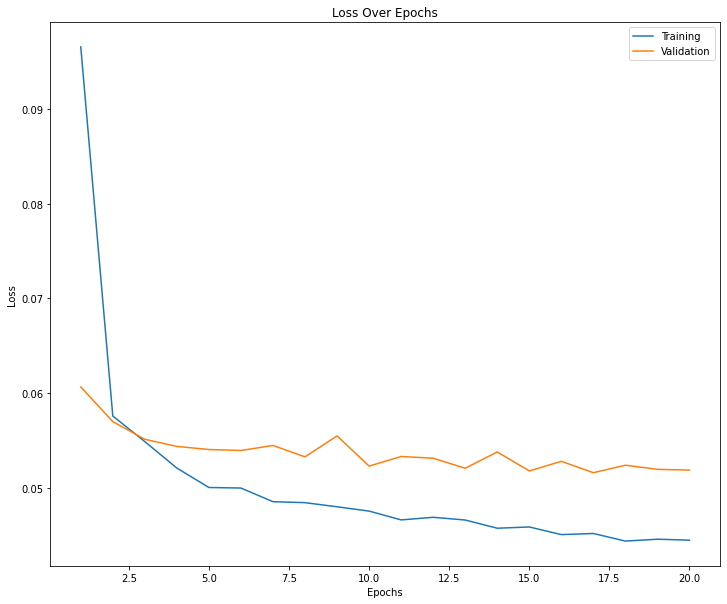

In [77]:
# Plot training and validation loss (mean absolute error)
plt.figure(figsize=(12,10))
plt.plot(train_epochs, train_losses, label='Training')
plt.plot(val_epochs, val_losses, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

### Train MLP with Images Only

Training model with only images, no tabular data.
beginning training


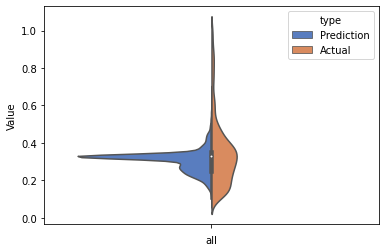

train loss (epoch: 1): 0.1281405386033949
validation loss (epoch: 1): 0.12142002541157934
beginning training


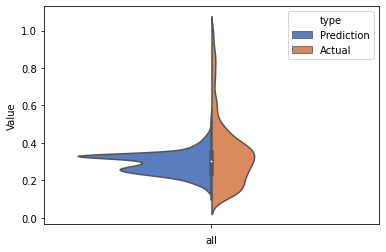

train loss (epoch: 2): 0.11894218173328337
validation loss (epoch: 2): 0.1197553500533104
beginning training


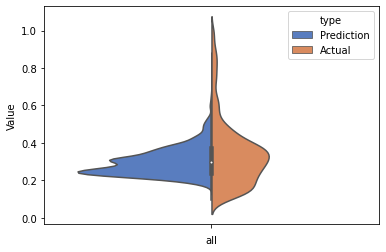

train loss (epoch: 3): 0.11657318996859121
validation loss (epoch: 3): 0.11775036859843466
beginning training


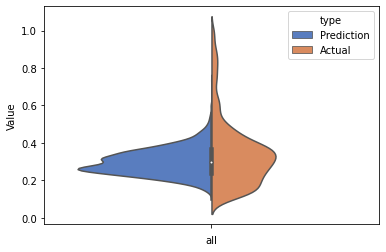

train loss (epoch: 4): 0.11467720248869487
validation loss (epoch: 4): 0.11639016990860303
beginning training


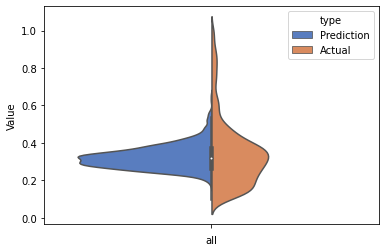

train loss (epoch: 5): 0.11409482466323036
validation loss (epoch: 5): 0.1154337144560284
beginning training


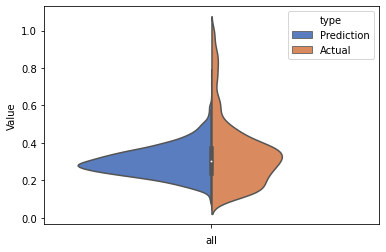

train loss (epoch: 6): 0.11236888481365455
validation loss (epoch: 6): 0.11623841482732031
beginning training


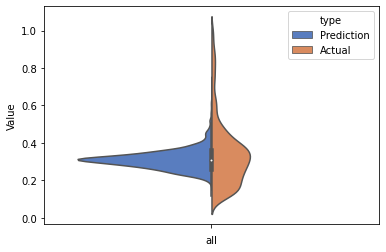

train loss (epoch: 7): 0.11219725864274162
validation loss (epoch: 7): 0.1147970635857847
beginning training


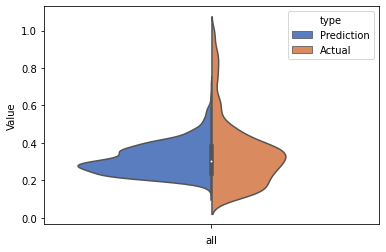

train loss (epoch: 8): 0.11130228712336047
validation loss (epoch: 8): 0.11380375549197197
beginning training


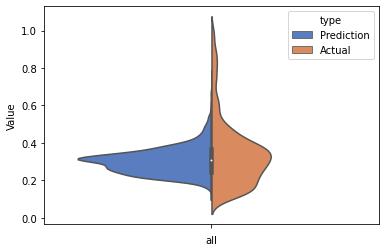

train loss (epoch: 9): 0.11096367068015613
validation loss (epoch: 9): 0.11333890466226472
beginning training


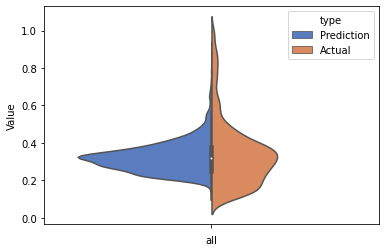

train loss (epoch: 10): 0.11012434075166891
validation loss (epoch: 10): 0.11436058787835969
beginning training


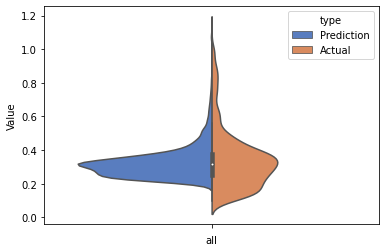

train loss (epoch: 11): 0.10958798696379085
validation loss (epoch: 11): 0.1154349111020565
beginning training


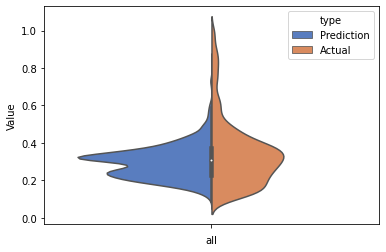

train loss (epoch: 12): 0.10960637057548041
validation loss (epoch: 12): 0.11482223164704111
beginning training


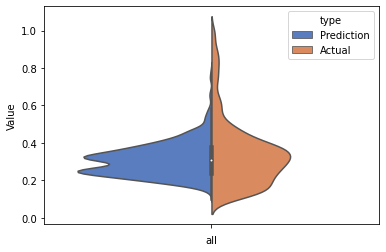

train loss (epoch: 13): 0.10843416418020542
validation loss (epoch: 13): 0.1142493945856889
beginning training


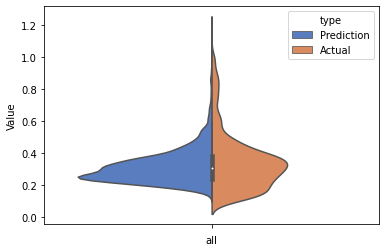

train loss (epoch: 14): 0.10806097532366658
validation loss (epoch: 14): 0.1150969122019079
beginning training


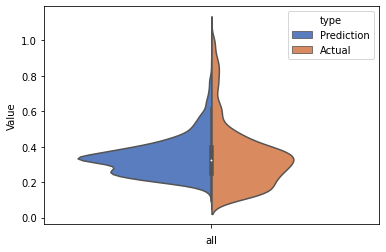

train loss (epoch: 15): 0.10804196414384214
validation loss (epoch: 15): 0.11846345249149534
beginning training


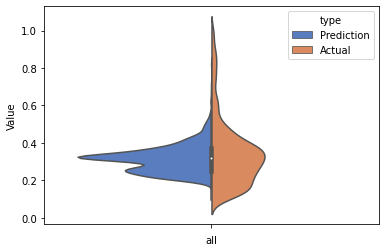

train loss (epoch: 16): 0.10825053283146449
validation loss (epoch: 16): 0.11446745859252082
beginning training


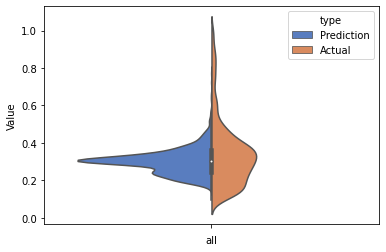

train loss (epoch: 17): 0.10741311721094363
validation loss (epoch: 17): 0.11423640449841817
beginning training


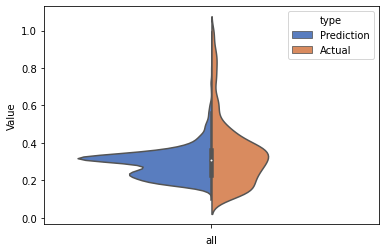

train loss (epoch: 18): 0.10639432547511635
validation loss (epoch: 18): 0.11355571324626605
beginning training


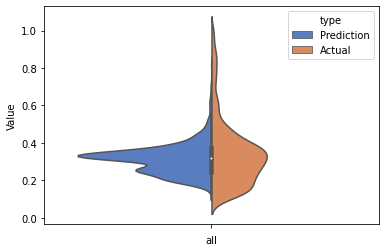

train loss (epoch: 19): 0.10732947691128804
validation loss (epoch: 19): 0.11208437755703926
beginning training


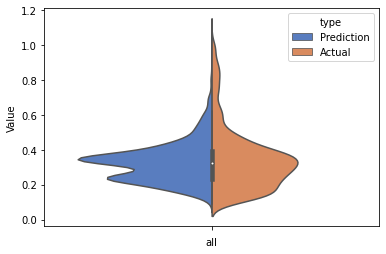

train loss (epoch: 20): 0.10558182246737428
validation loss (epoch: 20): 0.11495799902412626


In [82]:
# Train model using only images, no tabular features
# Get model, optimizer, and do training
imageMLP = ImageMLP(image_model_only=True)
optimizer = Adam(imageMLP.parameters(), lr=1e-2)
train_epochs, train_losses, val_epochs, val_losses = train_model(
    imageMLP, optimizer, nn.L1Loss(), train_dataset, val_dataset, epochs=20, visualize_func=visualize_func,
    batch_size=100)

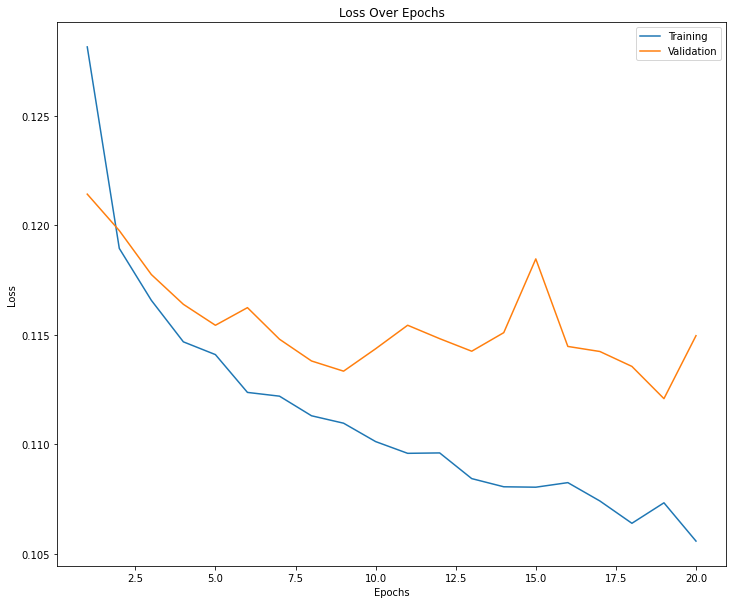

In [83]:
# Plot training and validation loss (mean absolute error)
plt.figure(figsize=(12,10))
plt.plot(train_epochs, train_losses, label='Training')
plt.plot(val_epochs, val_losses, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

## Exploratory Analysis of Bias

In [ ]:
# Read in data to use in bias analysis
bias_df = pd.read_csv(data_path)
bias_df.head()

,image_id,street,citi,n_citi,bed,bath,sqft,price
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100


In [ ]:
'''
This data was pulled from https://www.census.gov/quickfacts/geo/dashboard/
which is an online census containg data for US cities. The site only allowed us 
to pull 6 cities at a time into a CSV which is why we have 4 different CSV files
that we ultimately combine.
'''

city_dem1 = pd.read_csv('/content/drive/MyDrive/DS4420_Project/city_dem1.csv')
city_dem2 = pd.read_csv('/content/drive/MyDrive/DS4420_Project/city_dem2.csv')
city_dem3 = pd.read_csv('/content/drive/MyDrive/DS4420_Project/city_dem3.csv')
city_dem4 = pd.read_csv('/content/drive/MyDrive/DS4420_Project/city_dem4.csv')
dfs = [city_dem1, city_dem2]

city_dem1 = city_dem1.T
city_dem2 = city_dem2.T
city_dem3 = city_dem3.T
city_dem4 = city_dem4.T

city_dem1 = city_dem1.iloc[:, 9:17]
city_dem2 = city_dem2.iloc[:, 9:17]
city_dem3 = city_dem3.iloc[:, 9:17]
city_dem4 = city_dem4.iloc[:, 9:17]
columns = ['White', 'Black', 'Native', 'Asian', 'Pacific_Islander', 
             'Two_or_More_Races', 'Hispanic_or_Latino', 'White_not_Hispanic_Latino']
city_dem1.columns = columns
city_dem2.columns = columns 
city_dem3.columns = columns 
city_dem4.columns = columns 
city_dem1 = city_dem1.drop(city_dem1.index[[0, 1, 3, 5, 7, 9, 11, 13]])
city_dem2 = city_dem2.drop(city_dem2.index[[0, 1, 3, 5, 7, 9, 11, 13]])
city_dem3 = city_dem3.drop(city_dem3.index[[0, 1, 3, 5, 7, 9, 11, 13]])
city_dem4 = city_dem4.drop(city_dem4.index[[0, 1, 3, 5, 7, 9, 11, 13]])

In [ ]:
# combining the city demographic datasets

city_dem = pd.concat([city_dem1, city_dem2, city_dem3, city_dem4])
city_dem.reset_index(inplace=True)
city_dem = city_dem.rename(columns = {'index':'City'})

# converting the datatype to floats
for col in city_dem.columns[1:]:
  city_dem[col] = city_dem[col].str.rstrip('%').astype('float') / 100.0

city_dem = city_dem.drop_duplicates()
city_dem.reset_index(drop=True, inplace=True)
city_dem.head()

,City,White,Black,Native,Asian,Pacific_Islander,Two_or_More_Races,Hispanic_or_Latino,White_not_Hispanic_Latino
0,"Tehachapi city, California",0.769,0.070,0.003,0.024,0.001,0.060,0.359,0.515
1,"Rosamond CDP, California",0.677,0.104,0.009,0.015,0.000,0.061,0.409,0.441
2,"Calexico city, California",0.683,0.002,0.003,0.009,0.000,0.093,0.975,0.015
3,"Imperial city, California",0.721,0.012,0.001,0.033,0.000,0.124,0.820,0.129
4,"Salton City CDP, California",0.550,0.022,0.005,0.013,0.003,0.040,0.653,0.294


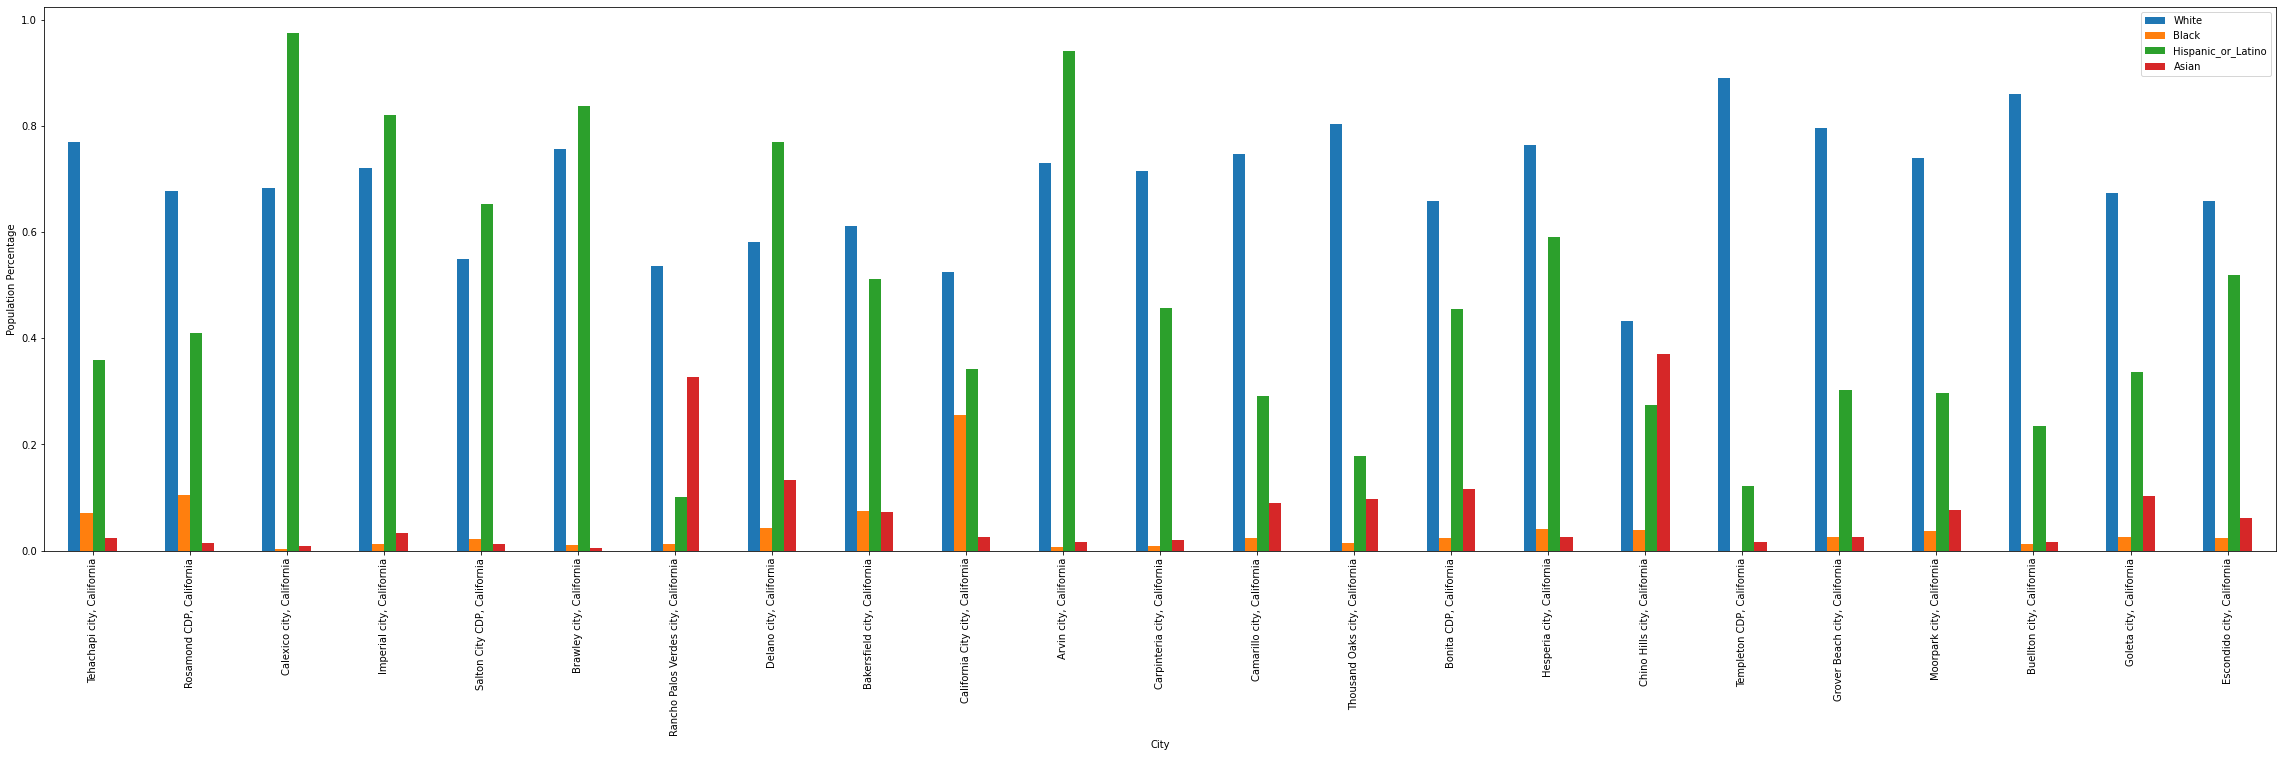

In [ ]:
# Shows the different cities along with their different popoulation percentages
city_dem.plot(x="City", y=["White", "Black", "Hispanic_or_Latino", "Asian"],
              ylabel='Population Percentage', kind="bar", figsize=(40, 10))

In [ ]:
# finding the average house price by city, and then filtering for the cities that are in the demographic dataframe
bias_df_grouped = bias_df.groupby('citi', as_index=False)['price'].mean()
city_prices = bias_df_grouped.loc[bias_df_grouped['citi'].isin(['Tehachapi, CA', 'Rosamond, CA', 'Calexico, CA', 'Imperial, CA', 'Salton City, CA', 'Brawley, CA',
                                                  'Rancho Palos Verdes, CA', 'Delano, CA', 'Bakersfield, CA', 'California City, CA', 'Arvin, CA', 'Carpinteria, CA',
                                                   'Camarillo, CA', 'Thousand Oaks, CA', 'Bonita, CA', 'Hesperia, CA', 'Chino Hills, CA', 'Templeton, CA', 'Grover Beach, CA',
                                                   'Moorpark, CA', 'Buellton, CA', 'Goleta, CA', 'Escondido, CA'])]

In [ ]:
# resetting the index and renaming columns
city_prices.reset_index(drop=True, inplace=True)
city_prices.rename(columns = {'citi': 'City', 'price':'Price'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# renaming the cities to match the housing dataset
city_dem['City'] = ['Tehachapi, CA', 'Rosamond, CA', 'Calexico, CA', 'Imperial, CA', 'Salton City, CA', 'Brawley, CA',
                    'Rancho Palos Verdes, CA', 'Delano, CA', 'Bakersfield, CA', 'California City, CA', 'Arvin, CA', 'Carpinteria, CA',
                    'Camarillo, CA', 'Thousand Oaks, CA', 'Bonita, CA', 'Hesperia, CA', 'Chino Hills, CA', 'Templeton, CA', 'Grover Beach, CA',
                    'Moorpark, CA', 'Buellton, CA', 'Goleta, CA', 'Escondido, CA']
city_dem.head()

,City,White,Black,Native,Asian,Pacific_Islander,Two_or_More_Races,Hispanic_or_Latino,White_not_Hispanic_Latino
0,"Tehachapi, CA",0.769,0.070,0.003,0.024,0.001,0.060,0.359,0.515
1,"Rosamond, CA",0.677,0.104,0.009,0.015,0.000,0.061,0.409,0.441
2,"Calexico, CA",0.683,0.002,0.003,0.009,0.000,0.093,0.975,0.015
3,"Imperial, CA",0.721,0.012,0.001,0.033,0.000,0.124,0.820,0.129
4,"Salton City, CA",0.550,0.022,0.005,0.013,0.003,0.040,0.653,0.294


In [ ]:
# merging the demographic and price datasets
merged_dem_price = pd.merge(city_dem, city_prices, on='City')
merged_dem_price.head()

,City,White,Black,Native,Asian,Pacific_Islander,Two_or_More_Races,Hispanic_or_Latino,White_not_Hispanic_Latino,Price
0,"Tehachapi, CA",0.769,0.070,0.003,0.024,0.001,0.060,0.359,0.515,384428.976744
1,"Rosamond, CA",0.677,0.104,0.009,0.015,0.000,0.061,0.409,0.441,391686.875000
2,"Calexico, CA",0.683,0.002,0.003,0.009,0.000,0.093,0.975,0.015,400050.000000
3,"Imperial, CA",0.721,0.012,0.001,0.033,0.000,0.124,0.820,0.129,273950.000000
4,"Salton City, CA",0.550,0.022,0.005,0.013,0.003,0.040,0.653,0.294,445950.000000


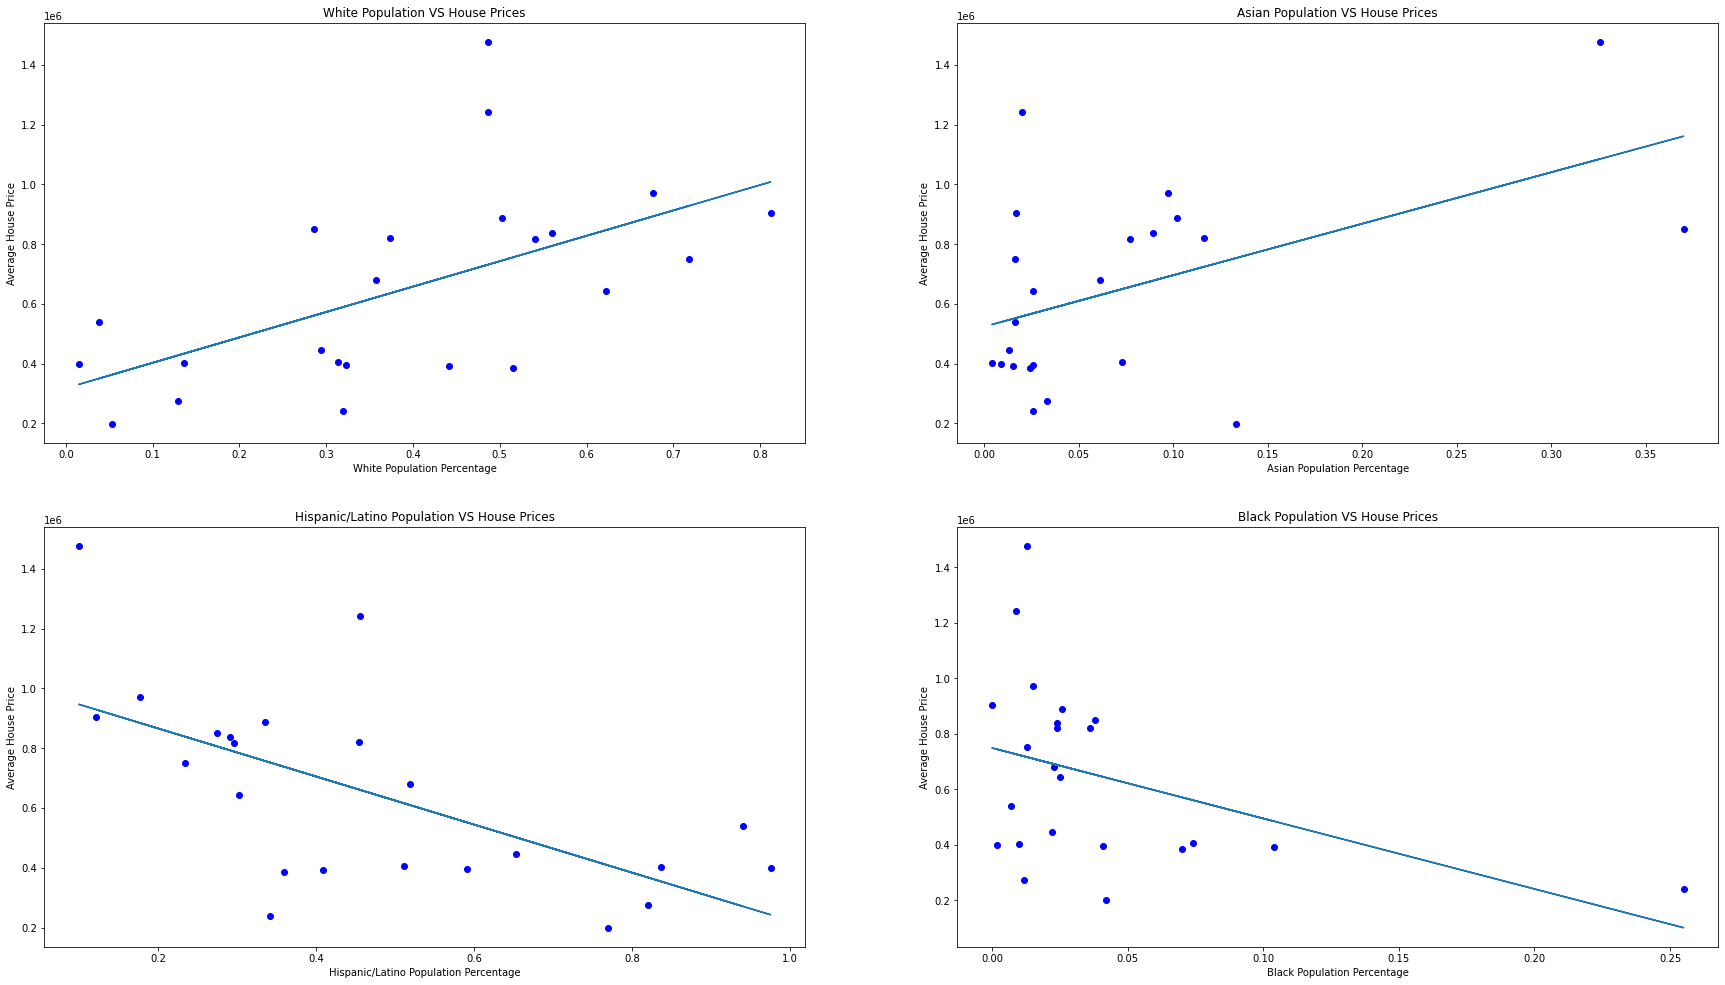

In [ ]:
# Plotting the information about the demographics vs housing prices

# Plotting White population statistics
fig, axs = plt.subplots(2, 2, figsize=(30, 17))
axs[0, 0].scatter(merged_dem_price['White_not_Hispanic_Latino'], merged_dem_price['Price'], c='b', label='White')
axs[0, 0].set_title('White Population VS House Prices')
axs[0, 0].set_xlabel('White Population Percentage')
axs[0, 0].set_ylabel('Average House Price')
m, b = np.polyfit(merged_dem_price['White_not_Hispanic_Latino'], merged_dem_price['Price'], 1)
axs[0, 0].plot(merged_dem_price['White_not_Hispanic_Latino'], m * merged_dem_price['White_not_Hispanic_Latino'] + b)

# Plotting Black population statistics
axs[1, 1].scatter(merged_dem_price['Black'], merged_dem_price['Price'], c='b', label='Black')
axs[1, 1].set_title('Black Population VS House Prices')
axs[1, 1].set_xlabel('Black Population Percentage')
axs[1, 1].set_ylabel('Average House Price')
m, b = np.polyfit(merged_dem_price['Black'], merged_dem_price['Price'], 1)
axs[1, 1].plot(merged_dem_price['Black'], m * merged_dem_price['Black'] + b)

# Plotting Hispanic/Latino population statistics
axs[1, 0].scatter(merged_dem_price['Hispanic_or_Latino'], merged_dem_price['Price'], c='b', label='Hispanic/Latino')
axs[1, 0].set_title('Hispanic/Latino Population VS House Prices')
axs[1, 0].set_xlabel('Hispanic/Latino Population Percentage')
axs[1, 0].set_ylabel('Average House Price')
m, b = np.polyfit(merged_dem_price['Hispanic_or_Latino'], merged_dem_price['Price'], 1)
axs[1, 0].plot(merged_dem_price['Hispanic_or_Latino'], m * merged_dem_price['Hispanic_or_Latino'] + b)

# Plotting Asian population statistics
axs[0, 1].scatter(merged_dem_price['Asian'], merged_dem_price['Price'], c='b', label='Asian')
axs[0, 1].set_title('Asian Population VS House Prices')
axs[0, 1].set_xlabel('Asian Population Percentage')
axs[0, 1].set_ylabel('Average House Price')
m, b = np.polyfit(merged_dem_price['Asian'], merged_dem_price['Price'], 1)
axs[0, 1].plot(merged_dem_price['Asian'], m * merged_dem_price['Asian'] + b)

In [ ]:
# Looking at the correlations between the demographics and prices

col1 = merged_dem_price['White_not_Hispanic_Latino']
col2 = merged_dem_price['Black']
col3 = merged_dem_price['Hispanic_or_Latino']
col5 = merged_dem_price['Asian']
col4 = merged_dem_price['Price']

print("Correlation between White and Price: ", col1.corr(col4))
print("Correlation between Asian and Price: ", col5.corr(col4))
print("Correlation between Black and Price: ", col2.corr(col4))
print("Correlation between Hispanic/Latino and Price: ", col3.corr(col4))